In [2]:
from ensembled_model import EnsembledModel
from pathlib import Path
import random
model = EnsembledModel()
data_train_path = Path('data/train')
data_test_path = Path('data/test')

In [10]:
epochs = 10

image_train_list  = list(data_train_path.glob('*/*.jpg'))
image_test_list = list(data_test_path.glob('*/*.jpg'))
random.shuffle(image_train_list)
random.shuffle(image_test_list)

image_train_list = image_train_list[:10]
image_test_list = image_test_list[:10]

In [25]:
from PIL import Image
train_acc = 0
for i in image_train_list:
        real_label = int(str(i).split('\\')[-2])
        img = Image.open(i)
        label_dict = model.forward(img)
        if label_dict['label'] == real_label:
            train_acc+=1
train_acc = train_acc/10
train_acc

1.0

In [26]:
test_acc = 0
for i in image_test_list:
        real_label = int(str(i).split('\\')[-2])
        img = Image.open(i)
        label_dict = model.forward(img)
        if label_dict['label'] == real_label:
            test_acc+=1
test_acc = test_acc/10
test_acc

0.8

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

image_train_list  = list(data_train_path.glob('*/*.jpg'))
random.shuffle(image_train_list)

image_train_list = image_train_list[:40]
real_labels = []
pred_labels = []
for i in image_train_list:
        real_label = int(str(i).split('\\')[-2])
        img = Image.open(i)
        label_dict = model.forward(img)
        real_labels.append(real_label)
        pred_labels.append(label_dict['label'])

real_labels = np.array(real_labels)
pred_labels = np.array(pred_labels)

cm_train = confusion_matrix(real_labels, pred_labels)

        
        

In [32]:
n_classes = cm_train.shape[0]

# Calculate recall for each class
recall_per_class = []
for i in range(n_classes):
    TP = cm_train[i, i]  # True Positives for class i
    FN = np.sum(cm_train[i, :]) - TP  # False Negatives for class i
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    recall_per_class.append(recall)

print("Recall for each class:", recall_per_class)

Recall for each class: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

image_test_list = list(data_test_path.glob('*/*.jpg'))
random.shuffle(image_test_list)

image_test_list = image_test_list[:40]
real_labels = []
pred_labels = []
for i in image_test_list:
        real_label = int(str(i).split('\\')[-2])
        img = Image.open(i)
        label_dict = model.forward(img)
        real_labels.append(real_label)
        pred_labels.append(label_dict['label'])

real_labels = np.array(real_labels)
pred_labels = np.array(pred_labels)

cm_test = confusion_matrix(real_labels, pred_labels)

In [43]:

from sklearn.metrics import confusion_matrix
import numpy as np
from PIL import Image
import random
import os
from pathlib import Path

# Example setup (you would replace these paths with your actual paths)
data_test_path = Path("data/test")  # Replace with your actual test data path
model = EnsembledModel()  # Your model object should be defined here

image_test_list = list(data_test_path.glob('*/*.jpg'))
random.shuffle(image_test_list)

image_test_list = image_test_list[:40]
real_labels = []
pred_labels = []

for i in image_test_list:
    real_label = int(str(i).split(os.sep)[-2])  # Use os.sep for cross-platform compatibility
    img = Image.open(i)
    label_dict = model.forward(img)
    real_labels.append(real_label)
    pred_labels.append(label_dict['label'])

real_labels = np.array(real_labels)
pred_labels = np.array(pred_labels)

cm_test = confusion_matrix(real_labels, pred_labels)
n_classes = cm_test.shape[0]

# Calculate recall for each class
recall_per_class = []
for i in range(n_classes):
    TP = cm_test[i, i]  # True Positives for class i
    FN = np.sum(cm_test[i, :]) - TP  # False Negatives for class i
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    recall_per_class.append(recall)

print("Recall for each class:", recall_per_class)

Recall for each class: [0.75, 0.25, 0.75, 0.8, 0.3333333333333333, 0.6666666666666666, 0.75, 1.0]


In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
from PIL import Image
import random
import os
from pathlib import Path

# Example setup (you would replace these paths with your actual paths)
data_test_path = Path("data/test")  # Replace with your actual test data path
model = EnsembledModel()  # Your model object should be defined here

image_test_list = list(data_test_path.glob('*/*.jpg'))
random.shuffle(image_test_list)

image_test_list = image_test_list[:40]
real_labels = []
pred_labels = []

for i in image_test_list:
    real_label = int(str(i).split(os.sep)[-2])  # Use os.sep for cross-platform compatibility
    img = Image.open(i)
    label_dict = model.forward(img)
    real_labels.append(real_label)
    pred_labels.append(label_dict['label'])

real_labels = np.array(real_labels)
pred_labels = np.array(pred_labels)

cm_test = confusion_matrix(real_labels, pred_labels)
n_classes = cm_test.shape[0]

# Calculate precision for each class
precision_per_class = []
for i in range(n_classes):
    TP = cm_test[i, i]  # True Positives for class i
    FP = np.sum(cm_test[:, i]) - TP  # False Positives for class i
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    precision_per_class.append(precision)

print("Precision for each class:", precision_per_class)


Precision for each class: [1.0, 1.0, 0.6842105263157895, 0.875, 1.0, 1.0, 0.8571428571428571]


(40, 8)
(40, 8)


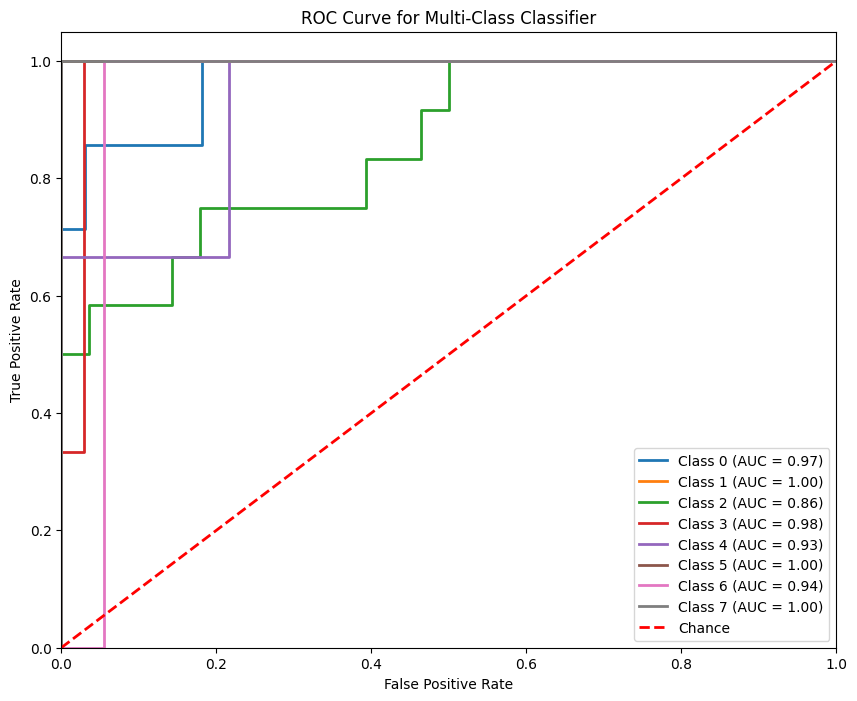

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from PIL import Image
import random
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Example setup (replace these paths with your actual paths)
data_test_path = Path("data/test")  # Replace with your actual test data path
model = EnsembledModel()  # Your model object should be defined here

image_test_list = list(data_test_path.glob('*/*.jpg'))
random.shuffle(image_test_list)

image_test_list = image_test_list[:40]
real_labels = []
pred_probs = []  # Store predicted probabilities

for i in image_test_list:
    real_label = int(str(i).split(os.sep)[-2])  # Use os.sep for cross-platform compatibility
    img = Image.open(i)
    probabilities = model.forward(img)  # Assuming this returns a list of probabilities
    real_labels.append(real_label)
    pred_probs.append(probabilities['probs'][0])

real_labels = np.array(real_labels)
pred_probs = np.array(pred_probs)

# Binarize the true labels
n_classes = len(np.unique(real_labels))
y_true_binarized = label_binarize(real_labels, classes=np.arange(8))
print(y_true_binarized.shape)
print(pred_probs.shape)

# Compute ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classifier')
plt.legend(loc="lower right")
plt.show()


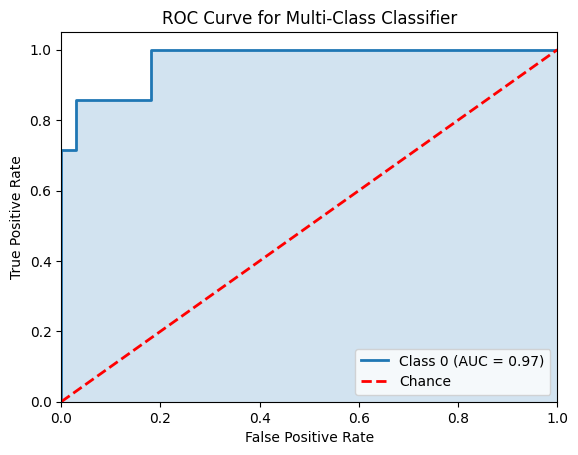

In [53]:
plt.plot(fpr[0], tpr[0], lw=2, label=f'Class {0} (AUC = {roc_auc[0]:.2f})')
plt.fill_between(fpr[0], tpr[0], alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classifier')
plt.legend(loc="lower right")
plt.show()

In [54]:
roc_auc

{0: 0.9696969696969696,
 1: 1.0,
 2: 0.8571428571428571,
 3: 0.9803921568627451,
 4: 0.9279279279279279,
 5: 1.0,
 6: 0.9444444444444444,
 7: 1.0}